In [1]:
%reset -f
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import re

"sklearn models"
import sklearn.datasets
import sklearn.linear_model
import sklearn.ensemble
import sklearn.neighbors
"sklearn utilities"
import sklearn.metrics
import sklearn.model_selection
import sklearn.base

In [2]:
!pwd

/Users/idrissaniakh/Desktop/DEV/organisme/AXA


In [3]:
train_data = pd.read_csv("multi_class/train.csv")
test_data = pd.read_csv("multi_class/test.csv")
train_data.head()

,id,AP,creation_date_answer,situation,ctc,location,gc_id,gc_label,creation_date_global,id_group,...,fruits_or_vegetables,number_of_fruit,id_group_3,creation_date_request,hobby,id_group_4,ville,green_vegetables,vegetable_type,target
0,a46cfa61ea20a,f,2019-03-13 11:14:42.549,-1,NaN,52,70,G,2019-01-17 10:50:57.767,2d7e206d46ea1,...,NaN,-1,812a43d710ace,2019-03-13 11:14:42.549,football,aa8f4934a31eb,NaN,f,NaN,0
1,c3d0cb8f0c5e2,f,2019-03-21 14:27:32.441,-1,NaN,78,10,A,2018-08-20 05:57:51.038,35e96d6848871,...,NaN,-1,4b59257f24573,2019-03-21 14:27:32.441,football,6ff9ea9ec85fd,NaN,f,NaN,1
2,05dfbe0ec3a8b,f,2019-03-15 17:49:50.67,-1,NaN,70,10,A,2018-12-20 13:45:51.752,ffaf8085e383d,...,NaN,-1,f1a838f0d194b,2019-03-15 17:49:50.67,football,6a49a0a97b049,NaN,f,NaN,0
3,952e869ee1076,f,2019-01-07 08:19:29.114,-1,f,84,10,A,2018-07-21 10:28:49.386,5360cf0a40ce3,...,NaN,0,c3196847d1c14,2019-01-07 08:19:29.114,football,d0dcf1ca1bf04,NaN,f,NaN,1
4,5bd0e71b1395b,f,2019-02-03 17:57:22.926,-1,NaN,29,20,D,2018-12-07 19:59:26.968,126c3211f23fc,...,NaN,-1,70e18c6fe58cd,2019-02-03 17:57:22.926,football,b4870b1c8eb42,NaN,f,NaN,1


In [4]:
test_data.head()

,id,AP,creation_date_answer,situation,ctc,location,gc_id,gc_label,creation_date_global,id_group,...,fruit_situation_label,fruits_or_vegetables,number_of_fruit,id_group_3,creation_date_request,hobby,id_group_4,ville,green_vegetables,vegetable_type
0,cb7a4e0dd0777,f,2019-03-13 07:00:52.562,30,NaN,100,40,B,2019-03-13 07:03:13.632,b6a3d931cbbaf,...,jzy,t,1,bc3a12cac647f,2019-03-13 07:00:52.562,football,b78bd3c9f945c,Saint-Leu,f,NaN
1,e78e3915f3e30,f,2019-01-07 13:45:55.741,-1,f,95,40,B,2018-12-18 18:28:41.942,1b35749232404,...,hetz,t,1,79aa2c96bd0fc,2019-01-07 13:45:55.741,football,6fed1653be26d,Créteil,f,NaN
2,8e65ba155f983,f,2019-01-25 14:01:07.041,-1,f,34,20,D,2018-01-17 13:12:05.124,8f7612ff2c9cc,...,ag,NaN,-1,4b634a698cc8e,2019-01-25 14:01:07.041,football,fb7b5da2ef839,Bordeaux,f,NaN
3,701e90ca03ce2,f,2019-01-16 14:35:11.432,10,f,45,40,B,2018-11-07 13:21:33.877,2e3620e03b5f3,...,ag,NaN,2,cccd30d947857,2019-01-16 14:35:11.432,football,3a230e52fb02e,Saint-Herblain,f,NaN
4,768fefec8609a,f,2019-02-11 14:25:37.331,10,f,95,100,H,2018-10-16 10:17:01.716,ac19c1e8abd0d,...,hetz,f,2,62769fb7addda,2019-02-11 14:25:37.331,football,94c376f28ea60,Drancy,f,NaN


In [5]:
train_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 24 entries, id to target
dtypes: int64(6), object(18)
memory usage: 4.6+ MB


In [6]:
test_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 23 entries, id to vegetable_type
dtypes: int64(5), object(18)
memory usage: 4.4+ MB


In [7]:
train_data.columns

Index(['id', 'AP', 'creation_date_answer', 'situation', 'ctc', 'location',
       'gc_id', 'gc_label', 'creation_date_global', 'id_group', 'id_group_2',
       'favorite_fruit', 'fruit_situation_id', 'fruit_situation_label',
       'fruits_or_vegetables', 'number_of_fruit', 'id_group_3',
       'creation_date_request', 'hobby', 'id_group_4', 'ville',
       'green_vegetables', 'vegetable_type', 'target'],
      dtype='object')

## Description des données

### Valeurs manquantes

In [8]:
train_data.apply(lambda col: sum(col.isnull()), axis=0)

id                           0
AP                           0
creation_date_answer         0
situation                    0
ctc                      15380
location                     0
gc_id                        0
gc_label                     0
creation_date_global         0
id_group                     0
id_group_2                   0
favorite_fruit               0
fruit_situation_id           0
fruit_situation_label     1728
fruits_or_vegetables     17341
number_of_fruit              0
id_group_3                   0
creation_date_request        0
hobby                        0
id_group_4                   0
ville                    16912
green_vegetables             0
vegetable_type           24586
target                       0
dtype: int64

* `ctc`: $15380$ valeurs manquantes, soit environ $62$% 
* `fruit_situation_label`: $1728$  valeurs manquantes, soit environ $7$% 
* `fruits_or_vegetables`: $17341$ valeurs manquantes, soit environ $69$%
* `ville`: $16912$ valeurs manquantes, soit environ $68$%
* `vegetable_type`: $24586$ valeurs manquantes, soit environ $98$%

### Variables 

Pour la suite nous allons devoir laisser à l'écart certaines variables dans notre étude. 
Celles qu'on vas pas utliser sont  les suivantes:
* `id`: Cette variable est un identifiant unique pour chaque passager ainsi le fait de les utliser pour les algorithmes d'apprentissage reviendrais à les apprendre nous mêmes les résultats à avoir. Ce qui  constitue un `bug`.
* `ctc`,`fruits_or_vegetables`, `ville`, `vegetable_type`: Ces variables ont trop de valeurs manquantes. Ce qui veut dire qu'on a trés peu d'informations sur ces critéres. C'est pourquoi on ne vas pas les utliser.
* `id_group`, `id_group_2`, `id_group_3`, `id_group_4`  résultant typiquement d'un `GROUP BY` ne seront pas considérés dans un premier temps. Si le temps me le permet et en fonction des résultats obtenus je vais les reconsider dans un deuxiéme temps en utlisant la fonction hachage `hash` pour les numériser. 

À ce niveau, on garde le reste des variables. D'autres devront éventuellement être retirées dans la suite pour. On le justifiera le cas échéant.

In [9]:
train_data_bis=train_data.drop(columns=['id','ctc','fruits_or_vegetables','ville','vegetable_type',
                                        'id_group','id_group_2', 'id_group_3','id_group_4'])
train_data_bis.head()

,AP,creation_date_answer,situation,location,gc_id,gc_label,creation_date_global,favorite_fruit,fruit_situation_id,fruit_situation_label,number_of_fruit,creation_date_request,hobby,green_vegetables,target
0,f,2019-03-13 11:14:42.549,-1,52,70,G,2019-01-17 10:50:57.767,poire,120,jzy,-1,2019-03-13 11:14:42.549,football,f,0
1,f,2019-03-21 14:27:32.441,-1,78,10,A,2018-08-20 05:57:51.038,clementine,10,ae,-1,2019-03-21 14:27:32.441,football,f,1
2,f,2019-03-15 17:49:50.67,-1,70,10,A,2018-12-20 13:45:51.752,clementine,200,ag,-1,2019-03-15 17:49:50.67,football,f,0
3,f,2019-01-07 08:19:29.114,-1,84,10,A,2018-07-21 10:28:49.386,clementine,10,ae,0,2019-01-07 08:19:29.114,football,f,1
4,f,2019-02-03 17:57:22.926,-1,29,20,D,2018-12-07 19:59:26.968,clementine,10,ae,-1,2019-02-03 17:57:22.926,football,f,1


### Statistiques descriptives

In [10]:
train_data_bis.dtypes

AP                       object
creation_date_answer     object
situation                 int64
location                  int64
gc_id                     int64
gc_label                 object
creation_date_global     object
favorite_fruit           object
fruit_situation_id        int64
fruit_situation_label    object
number_of_fruit           int64
creation_date_request    object
hobby                    object
green_vegetables         object
target                    int64
dtype: object

In [11]:
for feature in train_data_bis.columns:
    print("{0}: {1}".format(feature, len(train_data_bis[feature].unique())))

AP: 2
creation_date_answer: 24278
situation: 8
location: 99
gc_id: 12
gc_label: 12
creation_date_global: 15680
favorite_fruit: 2
fruit_situation_id: 22
fruit_situation_label: 22
number_of_fruit: 9
creation_date_request: 24280
hobby: 3
green_vegetables: 2
target: 4


#### Variables qualitatives

In [12]:
train_data_bis['target'].value_counts(dropna=False)

0    12077
1     8816
2     3874
3      233
Name: target, dtype: int64

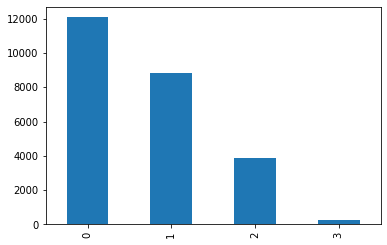

In [13]:
train_data_bis['target'].value_counts(dropna=False).plot(kind='bar');

In [14]:
train_data_bis['AP'].value_counts(dropna=False)

f    24914
t       86
Name: AP, dtype: int64

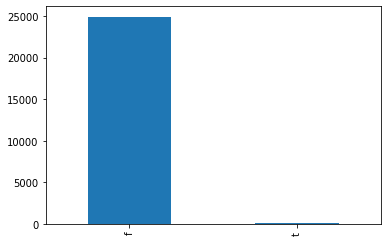

In [15]:
train_data_bis['AP'].value_counts(dropna=False).plot(kind='bar');

`AP` est une variable binaire. On voit que presque toutes les valeurs sont égales à `f` (exactement $99.656$%).

In [16]:
train_data_bis['situation'].value_counts(dropna=False)

-1     23965
 10      832
 30       82
 20       60
 40       25
 70       22
 50        9
 60        5
Name: situation, dtype: int64

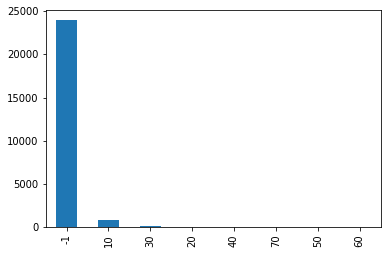

In [17]:
train_data_bis['situation'].value_counts(dropna=False).plot(kind='bar');

In [18]:
train_data_bis['location'].value_counts(dropna=False)

70        1245
68        1222
13        1147
60        1026
93         875
          ... 
49           4
314550       3
21           3
19           2
98           1
Name: location, Length: 99, dtype: int64

In [19]:
train_data_bis['location'].unique()

array([    52,     78,     70,     84,     29,     32,     96,     43,
           50,     47,      3,     60,     68,     95,      8,     34,
           93,     92,     45,     87,     14,     22,     33, 315670,
           51,     81,     36,    100,     69,     54,     39,     75,
       315710,     13,     10,     94,     80,     64,     58,     27,
            6,     88,     11,     18,     67,     89,     83,     26,
           38,     63,     35,     17,     73,     46,     61,     37,
           79,     99,     59,     72,      2,     16,     55,     71,
           15,     86,     53,     30,     28,     12,     66,     23,
           91,     57,     41,     74,     90,    101,     40,     31,
           25,      1,     85,     24,     97,     62,     82,      7,
           44,     56,     42,      4, 314550,     98,      9,     19,
           49,     21,      5])

On note clairement la présence de $3$ valeurs aberrantes : $315670$, $315710$ et $314550$. J'ai interprété cette variable comme le numéro de département en faisant la liaison avec la variable `villle`. Ainsi je suppose que les individus ont renseigné le code postal à la place du numéro de département.

In [20]:
train_data_bis.replace({'location': {315670: 31, 315710: 31, 314550: 31}}, inplace=True)

In [21]:
train_data_bis['location'].unique()

array([ 52,  78,  70,  84,  29,  32,  96,  43,  50,  47,   3,  60,  68,
        95,   8,  34,  93,  92,  45,  87,  14,  22,  33,  31,  51,  81,
        36, 100,  69,  54,  39,  75,  13,  10,  94,  80,  64,  58,  27,
         6,  88,  11,  18,  67,  89,  83,  26,  38,  63,  35,  17,  73,
        46,  61,  37,  79,  99,  59,  72,   2,  16,  55,  71,  15,  86,
        53,  30,  28,  12,  66,  23,  91,  57,  41,  74,  90, 101,  40,
        25,   1,  85,  24,  97,  62,  82,   7,  44,  56,  42,   4,  98,
         9,  19,  49,  21,   5])

<AxesSubplot:>

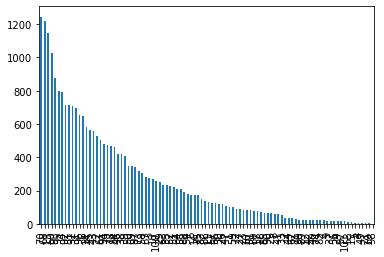

In [22]:
train_data_bis['location'].value_counts(dropna=False).plot(kind='bar')

In [23]:
train_data_bis['gc_id'].value_counts(dropna=False)

10     13813
20      3854
40      2282
100     2226
30       948
60       692
70       525
80       328
50       164
120      153
90        13
110        2
Name: gc_id, dtype: int64

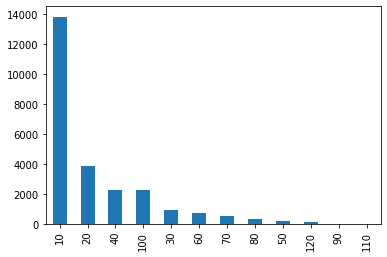

In [24]:
train_data_bis['gc_id'].value_counts(dropna=False).plot(kind='bar');
train_data_bis.astype({'gc_id': 'int64'},copy=False);

In [25]:
train_data_bis['gc_label'].value_counts(dropna=False)

A    13813
D     3854
B     2282
H     2226
C      948
L      692
G      525
K      328
I      164
E      153
F       13
J        2
Name: gc_label, dtype: int64

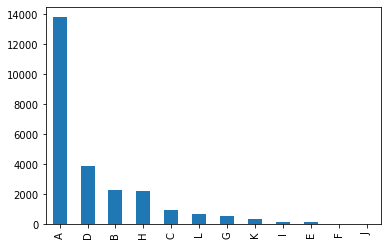

In [26]:
train_data_bis['gc_label'].value_counts(dropna=False).plot(kind='bar');

On voit que `gc_id` et `gc_label` ont exactement la même distribution. On supprime la variable `gc_label` qui n'est pas numérique et on garde `gc_id`.

In [27]:
train_data_bis.drop(columns=['gc_label'],inplace=True)

In [28]:
train_data_bis['favorite_fruit'].value_counts(dropna=False)

clementine    18147
poire          6853
Name: favorite_fruit, dtype: int64

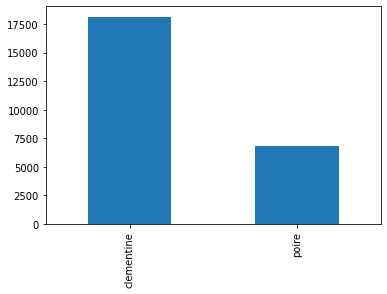

In [29]:
train_data_bis['favorite_fruit'].value_counts(dropna=False).plot(kind='bar');

In [30]:
train_data_bis['fruit_situation_id'].value_counts(dropna=False)

200    10651
10      7191
50      1821
170     1728
160      985
120      933
100      492
110      280
130      219
80       185
180      106
40        78
190       66
30        53
70        51
20        43
140       32
220       28
210       24
150       17
60        11
90         6
Name: fruit_situation_id, dtype: int64

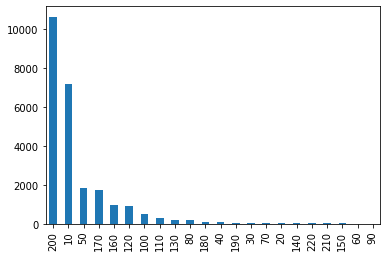

In [31]:
train_data_bis['fruit_situation_id'].value_counts(dropna=False).plot(kind='bar');

In [32]:
train_data_bis['fruit_situation_label'].value_counts(dropna=False)

ag      10651
ae       7191
hetz     1821
NaN      1728
zht       985
jzy       933
jyz       492
zyrj      280
dfhj      219
li        185
fyi       106
qg         78
RG         66
KDT        53
jwn        51
wfj        43
wjy        32
tej        28
jy         24
lou        17
fly        11
lfyi        6
Name: fruit_situation_label, dtype: int64

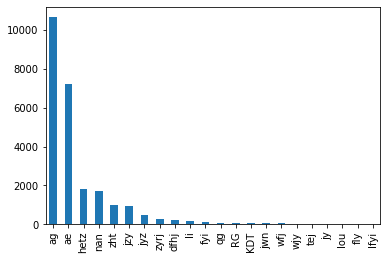

In [33]:
train_data_bis['fruit_situation_label'].value_counts(dropna=False).plot(kind='bar');

On voit que `fruit_situation_id` et `fruit_situation_label` ont exactement la même distribution si on considère les valeurs manquantes comme une caractéristique . On supprime la variable `gc_label` qui n'est pas numérique et on garde `fruit_situation_id`.

In [34]:
train_data_bis.drop(columns=['fruit_situation_label'],inplace=True)

In [35]:
train_data_bis['hobby'].value_counts(dropna=False)

football      24661
volleyball      310
noball           29
Name: hobby, dtype: int64

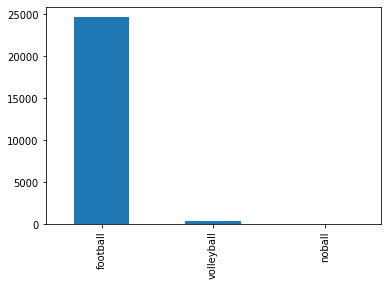

In [36]:
train_data_bis['hobby'].value_counts(dropna=False).plot(kind='bar');

In [37]:
train_data_bis['green_vegetables'].value_counts(dropna=False)

f    24564
t      436
Name: green_vegetables, dtype: int64

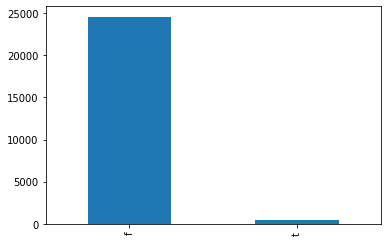

In [38]:
train_data_bis['green_vegetables'].value_counts(dropna=False).plot(kind='bar');

In [39]:
pd.crosstab(train_data_bis['AP'], train_data_bis['target'])

target,0,1,2,3
AP,,,,
f,12044,8769,3868,233
t,33,47,6,0


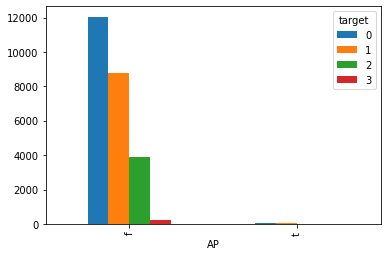

In [40]:
pd.crosstab(train_data_bis['AP'], train_data_bis['target']).plot(kind='bar');

In [41]:
pd.crosstab(train_data_bis['favorite_fruit'], train_data_bis['target'])

target,0,1,2,3
favorite_fruit,,,,
clementine,8490,7234,2321,102
poire,3587,1582,1553,131


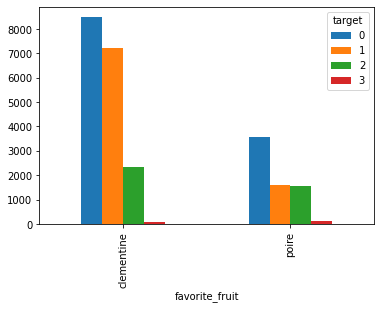

In [42]:
pd.crosstab(train_data_bis['favorite_fruit'], train_data_bis['target']).plot(kind='bar');

#### Variables quantitatives

In [43]:
my_date_string ="2019/03/13 07:00:42.548"
def DateConvert(val):
    split_string = re.split(r'-| |:', val)
    s = float(split_string[-1])
    si = int(s)
    ms = int((s - si)*10**6)
    split_string[-1] = si
    split_string.append(ms)
    split_string = [int(val) for val in split_string]
    x = datetime(*split_string)
    return datetime.timestamp(x)

#print(DateConvert(my_date_string))

In [44]:
train_data_bis['creation_date_answer_num']= train_data_bis['creation_date_answer'].apply(DateConvert)
train_data_bis['creation_date_global_num']= train_data_bis['creation_date_global'].apply(DateConvert)
train_data_bis['creation_date_request_num']= train_data_bis['creation_date_request'].apply(DateConvert)
train_data_bis.drop(columns=['creation_date_answer','creation_date_global', 'creation_date_request'], inplace=True)
train_data_bis.rename(columns={"creation_date_answer_num": "creation_date_answer", 
                               "creation_date_global_num": "creation_date_global",
                               "creation_date_request_num":"creation_date_request"},inplace=True)

In [45]:
train_data_bis.drop(columns=['AP','situation','location','gc_id','favorite_fruit',
                             'fruit_situation_id','hobby','green_vegetables','target']).describe()

,number_of_fruit,creation_date_answer,creation_date_global,creation_date_request
count,25000.000000,2.500000e+04,2.500000e+04,2.500000e+04
mean,-0.579080,1.550198e+09,1.537721e+09,1.550198e+09
std,0.858333,2.217397e+06,1.867217e+07,2.217504e+06
min,-1.000000,1.546309e+09,9.506556e+08,1.546309e+09
25%,-1.000000,1.548256e+09,1.532790e+09,1.548256e+09
50%,-1.000000,1.550213e+09,1.544105e+09,1.550213e+09
75%,0.000000,1.552101e+09,1.548435e+09,1.552101e+09
max,7.000000,1.554061e+09,1.555071e+09,1.554061e+09


Les varaibles `creation_date_answer	` et `creation_date_answer_num	` semblement linéairement liées. Pour le vérifier, on calcul la matrice de corrélation de Pearson.

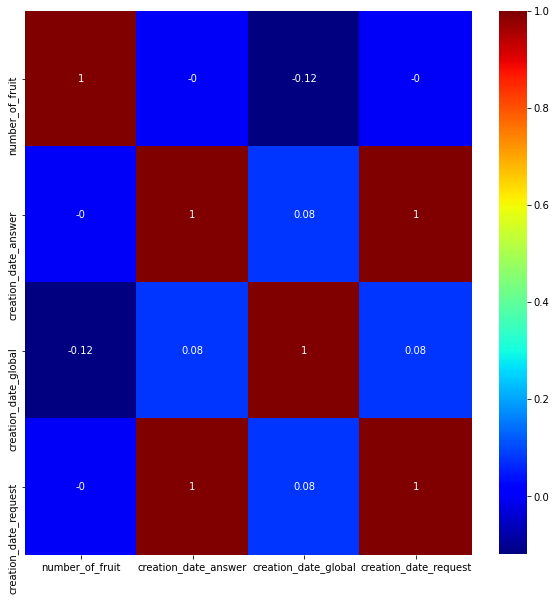

In [46]:
import seaborn as sb
corr = train_data_bis.drop(columns=['AP','situation','location','gc_id','favorite_fruit',
                                    'fruit_situation_id','hobby','green_vegetables','target']).corr()
plt.figure(1,figsize=(10,10))
sb.heatmap(np.round(corr,2), annot=True,cmap="jet");

On voit que le coefficient de corrélation vaut exactement $1$. J'imagine que les réponses aux demandent de création ont été automatisées. Dans la suite on ne garde que la variable `creation_date_request`.

In [47]:
train_data_bis.drop(columns=['creation_date_answer'],inplace=True)

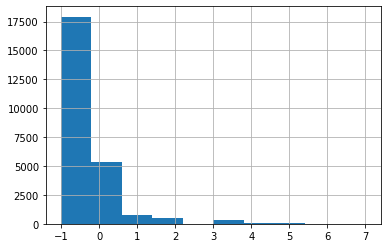

In [48]:
train_data_bis['number_of_fruit'].hist(bins=10);

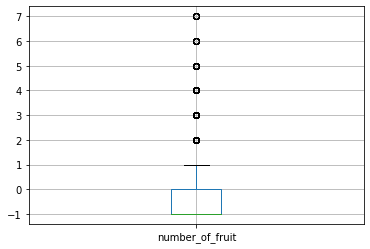

In [49]:
train_data_bis.boxplot(column='number_of_fruit');

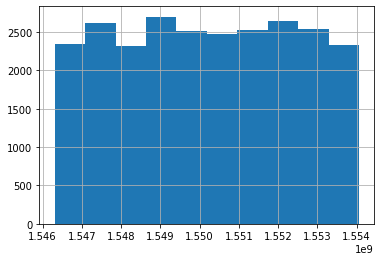

In [50]:
train_data_bis['creation_date_request'].hist(bins=10);

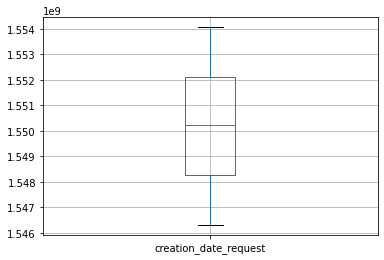

In [51]:
train_data_bis.boxplot(column='creation_date_request');

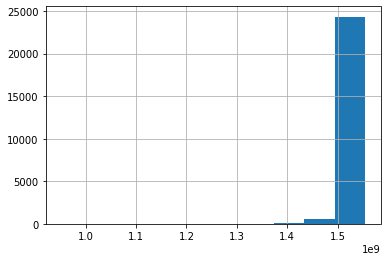

In [52]:
train_data_bis['creation_date_global'].hist(bins=10);

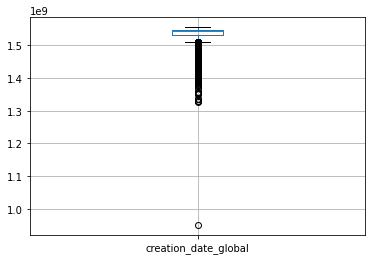

In [53]:
train_data_bis.boxplot(column='creation_date_global');

## Prétraitement

In [54]:
train_data_bis.dtypes

AP                        object
situation                  int64
location                   int64
gc_id                      int64
favorite_fruit            object
fruit_situation_id         int64
number_of_fruit            int64
hobby                     object
green_vegetables          object
target                     int64
creation_date_global     float64
creation_date_request    float64
dtype: object

In [55]:
train_data_bis.apply(lambda col: sum(col.isnull()), axis=0)

AP                       0
situation                0
location                 0
gc_id                    0
favorite_fruit           0
fruit_situation_id       0
number_of_fruit          0
hobby                    0
green_vegetables         0
target                   0
creation_date_global     0
creation_date_request    0
dtype: int64

On voit qu'à ce stade, on n'a plus de valeurs manquantes. On va s'appuyer sur la description des données effectuer précédemment afin de préparer nos données.

In [56]:
#train_data_bis.replace({'AP': {'f': 0, 't': 1}, 'favorite_fruit': {'clementine': 0, 'poire':1}, 'hobby': {'football': 0, 'volleyball': 1, 'noball': 2},'green_vegetables': {'f': 0, 't':1}},inplace=True)

On commence par numériser les variables qualitatives. 

In [57]:
class TransformQualitativeFeatures:
    
    def fit (self, X, y=None):
        return self
      
    def transform (self, X):
        df1= X['AP'].map({'f': 0, 't': 1})
        df2= X['favorite_fruit'].map({'clementine': 0, 'poire':1})
        df3= X['hobby'].map({'football': 0, 'volleyball': 1, 'noball': 2})
        df4= X['green_vegetables'].map({'f': 0, 't':1})
        df5 = X.drop(columns=['AP','favorite_fruit','hobby','green_vegetables'])
        
        return pd.concat([df1, df2, df3, df4, df5], axis=1)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [58]:
train_data_bis['number_of_fruit'].unique()

array([-1,  0,  1,  3,  4,  2,  6,  7,  5])

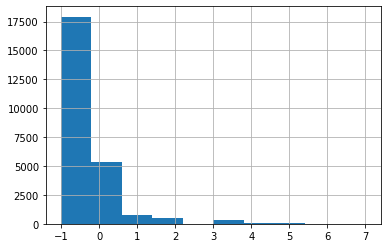

In [59]:
train_data_bis['number_of_fruit'].hist(bins=10);

On voit que la variable `number_of_fruit` est trés peu dispersé et je n'arrive pas à interprété la valeur $-1$. Je pense la catogoriser en utilisant les quartiles.

In [60]:
train_data_bis['number_of_fruit'].value_counts(dropna=False)

-1    17918
 0     5315
 1      789
 2      513
 3      320
 4       85
 5       42
 6       10
 7        8
Name: number_of_fruit, dtype: int64

In [61]:
class TransformQuantitativeFeaturesClass:
    
    def fit (self, X,  y=None ):
      
      return self
    
    
    def transform (self, X ):
        #X["number_of_fruit_Q"] = pd.qcut(X.number_of_fruit, q=4, labels=np.arange(4))
        return X
    
    def fit_transform(self, X, y=None):
        
        self.fit(X)
        return self.transform(X)

Les deux variables quantitatives `creation_date_global` et `creation_date_request` une fois converties en temps UNIX sont à grande échelle. Étant donnée que la majeure partie des algorithmes de scikit learn sont plus performants avec des données de petite échelle, nous allons les normaliser.

In [62]:
class FeatureScaling: 
      
    def fit(self,X):
        Y = X[['creation_date_global', 'creation_date_request']]
        self.mean_ = np.mean(Y.values,axis=0)
        self.std_ = np.std(Y.values,axis=0)
         
        return self
    
    def transform(self,X):
        
        Y = X[['creation_date_global', 'creation_date_request']]
        res=( Y.values - self.mean_[np.newaxis,:]) / self.std_[np.newaxis,:]
        
        df = pd.DataFrame( data = res, index = Y.index.values, columns = Y.columns.values )
        
        return pd.concat([ X.drop(columns=['creation_date_global', 'creation_date_request'] ) , df], axis=1)
      
    def fit_transform(self, X, y=None):
        
        self.fit(X)
        return self.transform(X)


In [63]:
class MyPipeline:
  
    def __init__(self, TransformQualitativeFeatures, TransformQuantitativeFeaturesClass, FeatureScaling):        
        self.transQuali = TransformQualitativeFeatures()
        self.transQuanti = TransformQuantitativeFeaturesClass()
        self.featScal = FeatureScaling()
        
    def fit (self, X, y=None ):
        X1 = self.transQuali.fit_transform(X)
        X2 = self.transQuanti.fit_transform(X1)
        self.featScal.fit(X2)
      
    def transform (self, X):
        X_quali = self.transQuali.transform(X)
        X_quanti = self.transQuanti.transform(X_quali)
        X_scal = self.featScal.transform(X_quanti)
        return X_scal
    
    def fit_transform(self, X, y=None):
        X1 = self.transQuali.fit_transform(X)
        X2 = self.transQuanti.fit_transform(X1)
        X3 = self.featScal.fit_transform(X2)
        return X3

In [64]:
pipeline = MyPipeline(TransformQualitativeFeatures, TransformQuantitativeFeaturesClass, FeatureScaling)
train_data_clean = pipeline.fit_transform(train_data_bis)
train_data_clean.apply(lambda col: sum(col.isnull()), axis=0)

AP                       0
favorite_fruit           0
hobby                    0
green_vegetables         0
situation                0
location                 0
gc_id                    0
fruit_situation_id       0
number_of_fruit          0
target                   0
creation_date_global     0
creation_date_request    0
dtype: int64

In [65]:
train_data_clean.dtypes

AP                         int64
favorite_fruit             int64
hobby                      int64
green_vegetables           int64
situation                  int64
location                   int64
gc_id                      int64
fruit_situation_id         int64
number_of_fruit            int64
target                     int64
creation_date_global     float64
creation_date_request    float64
dtype: object

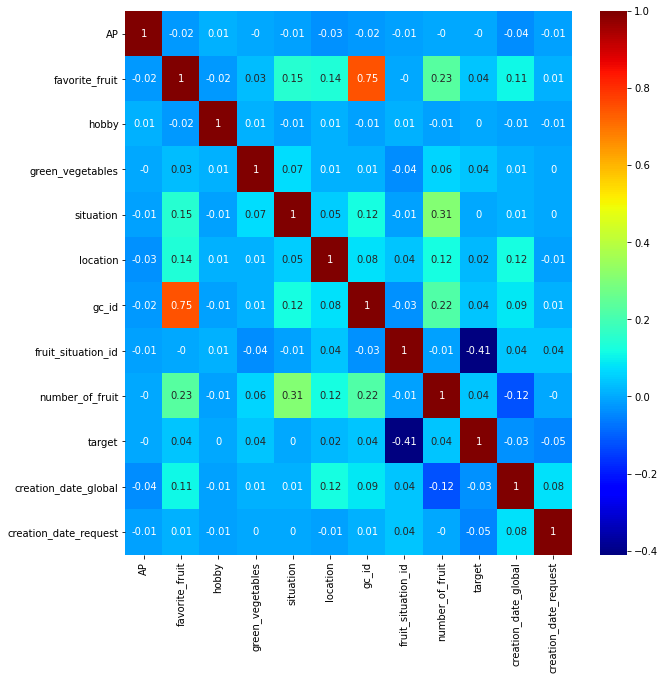

In [66]:
corr2= train_data_clean.corr()
plt.figure(1,figsize=(10,10))
sb.heatmap(np.round(corr2,2), annot=True,cmap="jet");

Maintenant qu'on a numérisé toutes les variables, on voit apparâitre de fortes nouvelles corrélations comme par exemple entre `favorite_fruit` et `gc_id` ; `fruit_situation_id` et `target`; `number_of_fruit` et `situation`. Comme je n'ai pas d'informations sur la base de donnée, je ne peux interpréter avec certitude mes observations. Notamment c'est difficile de bien cerner les variables qualitatives et quantitives. Je me suis basé relativement sur les noms des variables pour la prise de décision.

In [67]:
train_data_clean.head()

,AP,favorite_fruit,hobby,green_vegetables,situation,location,gc_id,fruit_situation_id,number_of_fruit,target,creation_date_global,creation_date_request
0,0,1,0,0,-1,52,70,120,-1,0,0.535448,1.025504
1,0,0,0,0,-1,78,10,10,-1,1,-0.159782,1.342430
2,0,0,0,0,-1,70,10,200,-1,0,0.406446,1.114123
3,0,0,0,0,-1,84,10,10,0,1,-0.297730,-1.511865
4,0,0,0,0,-1,29,20,10,-1,1,0.347491,-0.444213


In [68]:
X = train_data_clean.drop(columns=['target']).values
y = train_data_clean['target'].values

In [69]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=42, 
                                                                           test_size=0.2, stratify=y)

In [70]:
forest_clf=sklearn.ensemble.RandomForestClassifier(
    n_jobs=-1, 
    random_state=42,
    class_weight="balanced",
    criterion="entropy",
    bootstrap=True,
    oob_score=True,
    verbose=False)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy', n_jobs=-1,
                       oob_score=True, random_state=42, verbose=False)

In [71]:
y_hat_train=forest_clf.predict(X_train)
forest_clf.score(X_train,y_train)

1.0

In [72]:
y_hat_test=forest_clf.predict(X_test)
forest_clf.score(X_test,y_test)

0.6888

In [73]:
param_grid = [{'criterion': ["gini", "entropy"], 
                               'class_weight': ['balanced', 'balanced_subsample']}]

fr_clf = sklearn.ensemble.RandomForestClassifier()
grid_search = sklearn.model_selection.GridSearchCV(fr_clf, param_grid, cv=5, verbose=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_parameters=grid_search.get_params()

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [74]:
best_parameters
grid_search.score(X_test,y_test)

0.6916

In [75]:
def ComputeWeight(y):
    weight = np.zeros_like(y_test)
    weight[y_test==0]=1
    weight[y_test==1]=10
    weight[y_test==2]=100
    weight[y_test==3]=1000
    return weight

In [76]:
from sklearn.metrics import log_loss
y_hat_test_proba=forest_clf.predict_proba(X_test)
log_loss(y_test,y_hat_test_proba,labels=[0,1,2,3],normalize=True)

0.9188391457725497

In [77]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat_test, average='weighted', labels=[0,1,2,3])

0.6795429423322936

In [78]:
y_pred=np.empty_like(y_train)
skfolds=sklearn.model_selection.StratifiedKFold(n_splits=10)
for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = sklearn.base.clone(forest_clf)
    clone_clf.fit(X_train[train_index], y_train[train_index])
    y_pred[test_index] = clone_clf.predict(X[test_index])

In [79]:
conf_mx = sklearn.metrics.confusion_matrix(y_train, y_pred)
print(conf_mx)

[[4839 3371 1375   77]
 [3555 2512  927   59]
 [1577 1068  433   21]
 [  90   73   21    2]]


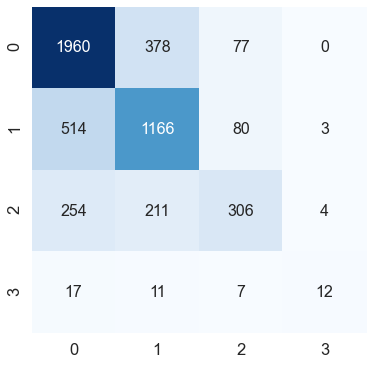

In [80]:
def confusion_matrix(y_test, pred_test):    
    con_mat = sklearn.metrics.confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(4), range(4))
   
    plt.figure(figsize=(6,6))
    sb.set(font_scale=1.5) 
    sb.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
y_hat_test=forest_clf.predict(X_test)

confusion_matrix(y_test, y_hat_test)

In [81]:
for name, score in zip(train_data_clean.drop(columns=['target']).columns, forest_clf.feature_importances_):
    print(name, score)

AP 0.0009676793990336538
favorite_fruit 0.017442812480003775
hobby 0.0031107339111419675
green_vegetables 0.00669337348646105
situation 0.006613608976322479
location 0.24239688809692
gc_id 0.05188841281963175
fruit_situation_id 0.15036103245388052
number_of_fruit 0.03003178414302116
creation_date_global 0.2502685436574967
creation_date_request 0.24022513057608696


On voit que beaucoup des variables ont peu dimportance dans la prédiction. Idéalement (si le temps me le permettait) on peut créér un modèle minimaliste avec les variables `creation_date_request`, `creation_date_global`, `fruit_situation_id` et `location`. Je devrais également faire de la `cross-validation` pour faire compétir avec d'autres classifiers comme les réseaux de neuronnes. Du fait que je n'ai pas fait de dummies  sur les variables catagorielles, les modèles linéaires du type Stochastic Gradient Descent ne fonctionnent pas correctement.

In [82]:
test_data.dtypes

id                       object
AP                       object
creation_date_answer     object
situation                 int64
ctc                      object
location                  int64
gc_id                     int64
gc_label                 object
creation_date_global     object
id_group                 object
id_group_2               object
favorite_fruit           object
fruit_situation_id        int64
fruit_situation_label    object
fruits_or_vegetables     object
number_of_fruit           int64
id_group_3               object
creation_date_request    object
hobby                    object
id_group_4               object
ville                    object
green_vegetables         object
vegetable_type           object
dtype: object

In [83]:
test_data_bis=test_data.drop(columns=['id','ctc','fruits_or_vegetables','ville','vegetable_type',
                                        'id_group','id_group_2', 'id_group_3','id_group_4'])

test_data_bis.astype({'gc_id': 'int64'},copy=False);

test_data_bis.replace({'location': {315670: 31, 315710: 31, 314550: 31}}, inplace=True)
test_data_bis.drop(columns=['gc_label'],inplace=True)
test_data_bis.drop(columns=['fruit_situation_label'],inplace=True)

test_data_bis['creation_date_answer_num']= test_data_bis['creation_date_answer'].apply(DateConvert)
test_data_bis['creation_date_global_num']= test_data_bis['creation_date_global'].apply(DateConvert)
test_data_bis['creation_date_request_num']= test_data_bis['creation_date_request'].apply(DateConvert)
test_data_bis.drop(columns=['creation_date_answer','creation_date_global', 'creation_date_request'], inplace=True)
test_data_bis.rename(columns={"creation_date_answer_num": "creation_date_answer", 
                               "creation_date_global_num": "creation_date_global",
                               "creation_date_request_num":"creation_date_request"},inplace=True)
test_data_bis.drop(columns=['creation_date_answer'],inplace=True)

En temps normalement ce type de traitement n'est pas idéal. Notamment le code n'est pas factorisé (duplication de code) et on peut se tromper facilement en procédant ainsi. L'idéal est de tout mettre dans le Pipeline de prétraitement. Mais encore j'ai une contrainte de temps.

In [84]:
pipeline = MyPipeline(TransformQualitativeFeatures, TransformQuantitativeFeaturesClass, FeatureScaling)
test_data_clean = pipeline.fit_transform(test_data_bis)
test_data_clean.apply(lambda col: sum(col.isnull()), axis=0)

AP                       0
favorite_fruit           0
hobby                    0
green_vegetables         0
situation                0
location                 0
gc_id                    0
fruit_situation_id       0
number_of_fruit          0
creation_date_global     0
creation_date_request    0
dtype: int64

In [85]:
test_data_clean.dtypes

AP                         int64
favorite_fruit             int64
hobby                      int64
green_vegetables           int64
situation                  int64
location                   int64
gc_id                      int64
fruit_situation_id         int64
number_of_fruit            int64
creation_date_global     float64
creation_date_request    float64
dtype: object

In [86]:
test_data_clean.head()

,AP,favorite_fruit,hobby,green_vegetables,situation,location,gc_id,fruit_situation_id,number_of_fruit,creation_date_global,creation_date_request
0,0,1,0,0,30,100,40,120,1,0.791197,1.019282
1,0,1,0,0,-1,95,40,50,1,0.406265,-1.495902
2,0,0,0,0,-1,34,20,200,-1,-1.120364,-0.795953
3,0,1,0,0,10,45,40,200,2,0.218575,-1.144803
4,0,1,0,0,10,95,100,50,2,0.117611,-0.134615


In [87]:
XX = test_data_clean.values

In [88]:
yy_pred = forest_clf.predict_proba(XX)
yy_pred

array([[0.71, 0.09, 0.2 , 0.  ],
       [0.02, 0.53, 0.45, 0.  ],
       [0.94, 0.05, 0.01, 0.  ],
       ...,
       [0.24, 0.76, 0.  , 0.  ],
       [0.87, 0.11, 0.01, 0.01],
       [0.31, 0.07, 0.61, 0.01]])

In [89]:
df1 = test_data['id']
df2 = pd.DataFrame(data=yy_pred, columns=[0,1,2,3])
res = pd.concat([df1, df2], axis=1)

In [90]:
res.to_csv('multi_class/res_pred.csv', index= False) 